### 🔧 Importing Essential Libraries

We begin by importing the foundational libraries needed for this analysis:

- `pandas` for handling data structures and operations.
- `numpy` for numerical computations.
- `matplotlib.pyplot` and `plotly` for visualizations.
- `warnings` to suppress warning messages for cleaner output.

These libraries will help us explore, visualize, and derive insights from the Apple product dataset.


In [ ]:
# Import the necessary libraries
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings # Don't display warnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

### 📥 Loading the Dataset

We load the Apple product dataset using `pandas.read_csv()`, pointing to the local path of the CSV file.


In [39]:
da = pd.read_csv(r"C:\Users\pc\Downloads\apple_products.csv")
da.head(2)

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB


## 🧹 Data Cleaning
Before diving into analysis, it was essential to clean the dataset to ensure accuracy and consistency:

- Describe the dataset to get the statistics using `.Describe()`
- Checking for missing data using `isna().sum().`
- Check the general info of the dataset using `.info()`


In [41]:
da.describe()

,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Star Rating
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,80073.887097,88058.064516,9.951613,22420.403226,1861.677419,4.575806
std,34310.446132,34728.825597,7.608079,33768.589550,2855.883830,0.059190
min,29999.000000,39900.000000,0.000000,542.000000,42.000000,4.500000
25%,49900.000000,54900.000000,6.000000,740.000000,64.000000,4.500000
50%,75900.000000,79900.000000,10.000000,2101.000000,180.000000,4.600000
75%,117100.000000,120950.000000,14.000000,43470.000000,3331.000000,4.600000
max,140900.000000,149900.000000,29.000000,95909.000000,8161.000000,4.700000


In [42]:
# check for null
da.isna().sum()

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Upc                    0
Star Rating            0
Ram                    0
dtype: int64

In [43]:
# check general info
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         62 non-null     object 
 1   Product URL          62 non-null     object 
 2   Brand                62 non-null     object 
 3   Sale Price           62 non-null     int64  
 4   Mrp                  62 non-null     int64  
 5   Discount Percentage  62 non-null     int64  
 6   Number Of Ratings    62 non-null     int64  
 7   Number Of Reviews    62 non-null     int64  
 8   Upc                  62 non-null     object 
 9   Star Rating          62 non-null     float64
 10  Ram                  62 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 5.5+ KB


📊 Analysis

- Descriptive Statistics: Summarized key metrics to understand data trends.
- Visual Exploration: Used plots to reveal patterns and outliers.

In [44]:
# See the total number of reviews
total_reviews = da['Number Of Reviews'].sum()
print('\n', 'The total reviews amounts to:', total_reviews, 'reviews', '\n')


 The total reviews amounts to: 115424 reviews 



In [45]:
# Plot
fig = px.histogram(
    da,
    x="Mrp",
    marginal="violin",
    barmode="overlay",
    opacity=0.7,
    color_discrete_sequence=["#08DAFF"],
    nbins=50
)

# Beautify layout with white fonts and dark background
fig.update_layout(
    title="🛒 Distribution of Maximum Retail Price (MRP)",
    title_font=dict(size=20, family="Arial Black", color="white"),
    xaxis_title="Maximum Retail Price",
    yaxis_title="Count",
    template="plotly_dark",  # dark theme
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(family="Segoe UI", size=14, color="white"),
    bargap=0.05,
    margin=dict(t=80, r=30, l=30, b=60),
)

# Tooltip styling & trace tweaks
fig.update_traces(
    marker_line_width=0,
    hovertemplate="MRP: %{x}<br>Count: %{y}"
)

fig.show()



In [ ]:
# plot the Distribution of Product Star Ratings
fig = px.histogram(
    da,
    x="Star Rating",
    marginal="violin",              # Adds a violin plot
    barmode="overlay",              # Overlays bars
    opacity=0.8,                    # Slight transparency
    color_discrete_sequence=["#08DAFF"],  # Sleek teal color
    nbins=6                         # Adjust based on unique star ratings
)

# Layout tweaks for a sexy look
fig.update_layout(
    title="⭐ Distribution of Product Star Ratings",
    title_font=dict(size=20, family="Verdana", color="white"),
    xaxis_title="Star Rating",
    yaxis_title="Number of Reviews",
    template="plotly_white",
    font=dict(family="Segoe UI", size=14, color="white"),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    bargap=0.2,
    margin=dict(t=80, r=30, l=30, b=60)
)

# Enhance hover interaction
fig.update_traces(
    marker_line_width=0,
    hovertemplate="Rating: %{x}<br>Count: %{y}"
)

fig.show()


In [ ]:
# Sort Values in star rating for plotting
highest_rated = da.sort_values(by=['Star Rating'] ,ascending=False).head(10)
highest_rated.head(2)

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
20,"APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)",https://www.flipkart.com/apple-iphone-11-pro-m...,Apple,117100,117100,0,1078,101,MOBFKCTSRYPAQNYT,4.7,4 GB
17,"APPLE iPhone 11 Pro Max (Space Grey, 64 GB)",https://www.flipkart.com/apple-iphone-11-pro-m...,Apple,117100,117100,0,1078,101,MOBFKCTSKDMKCGQS,4.7,4 GB


In [ ]:
# Plot Number of Reviews vs Ratings for Top 10 Rated iPhones
# Melt the data for grouped bar chart
df_long = highest_rated.melt(
    id_vars='Product Name',
    value_vars=['Number Of Reviews', 'Number Of Ratings'],
    var_name='Metric',
    value_name='Count'
)

# Plot
fig = px.bar(
    df_long,
    x='Product Name',
    y='Count',
    color='Metric',
    barmode='group',
    title='📱 Number of Reviews vs Ratings for Top 10 Rated iPhones',
    color_discrete_sequence=["#636EFA", "#EF553B"]
)

# Beautify
fig.update_layout(
    template='plotly_dark',
    font=dict(family="Segoe UI", size=14),
    title_font=dict(size=20, family="Arial Black"),
    xaxis_title="iPhone Model",
    yaxis_title="Count",
    xaxis_tickangle=45,
    margin=dict(t=80, l=40, r=30, b=100)
)

fig.show()


In [ ]:
# Plot Impact of Ratings and Discounts on Sale Price
fig = px.scatter(
    data_frame=da,
    x="Number Of Ratings",
    y="Sale Price",
    size="Discount Percentage",
    trendline="ols",
    color_discrete_sequence=["#EF476F"],
    opacity=0.7,
    title="💰 Impact of Ratings and Discounts on Sale Price"
)

# Layout beautification
fig.update_layout(
    template=('plotly_dark'),
    title_font=dict(size=22, family="Arial Black", color="grey"),
    font=dict(family="Segoe UI", size=14, color="grey"),
    xaxis_title="Number of Ratings",
    yaxis_title="Sale Price (₦)",
    plot_bgcolor="rgba(0,0,0,0)",
    paper_bgcolor="rgba(0,0,0,0)",
    margin=dict(t=80, l=40, r=30, b=60)
)

# Customize marker look
fig.update_traces(marker=dict(line=dict(width=1, color='white')))

# Optional: Format hover text for clarity
fig.update_traces(
    hovertemplate="<b>Ratings:</b> %{x}<br><b>Price:</b> ₦%{y}<br><b>Discount %:</b> %{marker.size:.1f}"
)

fig.show()


In [ ]:
# Plot Relationship Between Ratings and Discounts 
fig = px.scatter(
    data_frame=da,
    x="Number Of Ratings",
    y="Discount Percentage",
    size="Sale Price",
    trendline="ols",
    color_discrete_sequence=["#118AB2"],  # Stylish blue tone
    opacity=0.75,
    title="🔍 Relationship Between Ratings and Discounts (Bubble = Sale Price)"
)

# Beautify layout
fig.update_layout(
    template="plotly_dark",
    title_font=dict(size=22, family="Arial Black", color="grey"),
    font=dict(family="Segoe UI", size=14, color="grey"),
    xaxis_title="Number of Ratings",
    yaxis_title="Discount Percentage (%)",
    plot_bgcolor="rgba(0,0,0,0)",
    paper_bgcolor="rgba(0,0,0,0)",
    margin=dict(t=80, l=40, r=30, b=60)
)

# Bubble styling
fig.update_traces(
    marker=dict(line=dict(width=1, color='white')),
    hovertemplate="<b>Ratings:</b> %{x}<br><b>Discount:</b> %{y}%<br><b>Sale Price:</b> ₦%{marker.size:.0f}"
)

fig.show()


In [52]:
# prepare the data for plotting
Top_rated_Ram = da.groupby('Ram')['Number Of Ratings'].sum().sort_values(ascending=False)
Top_rated_Ram

Ram
4 GB    758747
2 GB    530102
3 GB     79512
6 GB     21704
Name: Number Of Ratings, dtype: int64

Text(0, 0.5, 'RAM Size (GB)')

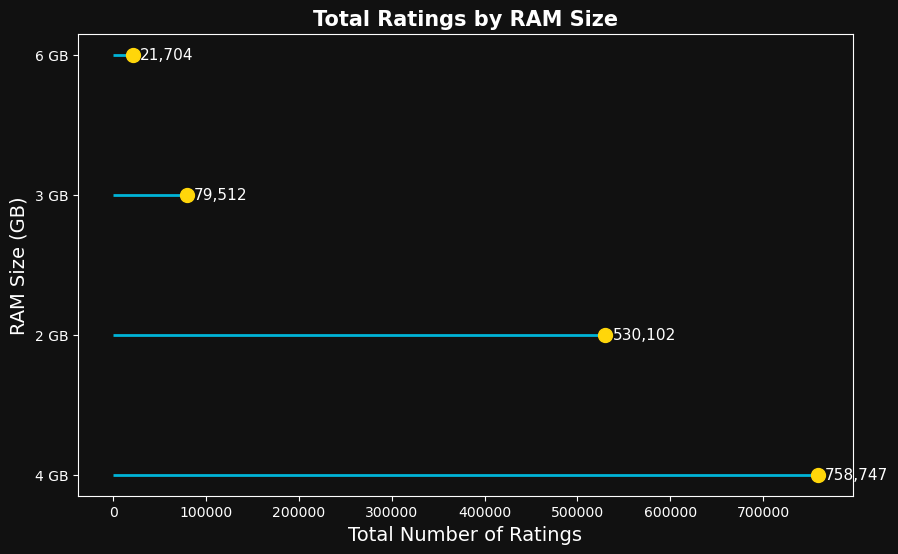

In [53]:

# Dark theme settings
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#111111')
ax.set_facecolor('#111111')

# Lollipop lines and points
ax.hlines(y=Top_rated_Ram.index.astype(str), xmin=0, xmax=Top_rated_Ram.values,
          color='#00B4D8', linewidth=2)
ax.plot(Top_rated_Ram.values, Top_rated_Ram.index.astype(str),
        'o', color='#FFD60A', markersize=10)

# Annotate values
for i, value in enumerate(Top_rated_Ram.values):
    ax.text(value + max(Top_rated_Ram.values) * 0.01, i, f"{value:,}",
            va='center', fontsize=11, color='white')

# Titles and labels
ax.set_title("Total Ratings by RAM Size", fontsize=15, fontweight='bold', color='white')
ax.set_xlabel("Total Number of Ratings", fontsize=14, color='white')
ax.set_ylabel("RAM Size (GB)", fontsize=14, color='white')



In [ ]:
# Prepare the data for plotting
Top_storage = da.groupby('Ram')['Sale Price'].sum().sort_values(ascending=False)
Top_storage

Ram
4 GB    2260987
6 GB    1931100
2 GB     730495
3 GB      41999
Name: Sale Price, dtype: int64

In [58]:
# Reuse the DataFrame
Top_storage_df = Top_storage.reset_index()
Top_storage_df.columns = ['Ram', 'Total Sale Price']

# Plot Total Sales by RAM Capacity
fig = px.bar(
    Top_storage_df,
    x='Ram',
    y='Total Sale Price',
    text='Total Sale Price',
    title="💾 Total Sales Price by RAM Capacity",
    color='Ram',
    color_discrete_sequence=px.colors.sequential.Plasma_r  # Bright palette
)

# Dark theme + white text
fig.update_layout(
    template='plotly_dark',
    title_font=dict(size=18, family="Arial Black", color="white"),
    font=dict(family="Segoe UI", size=14, color="white"),
    xaxis_title="RAM Size",
    yaxis_title="Total Sale Price (₦)",
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    margin=dict(t=80, l=40, r=30, b=60)
)

# Light label text on bars
fig.update_traces(
    texttemplate='%{text:.2s}',
    textposition='outside',
    textfont=dict(color='white')
)

fig.show()


In [ ]:
# Prepare the correlation for plotting
df=da.select_dtypes(include=[np.int64])
corelation=df.corr()
corelation

,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews
Sale Price,1.000000,0.985108,-0.569603,-0.701526,-0.696029
Mrp,0.985108,1.000000,-0.434340,-0.670093,-0.664651
Discount Percentage,-0.569603,-0.434340,1.000000,0.684827,0.685877
Number Of Ratings,-0.701526,-0.670093,0.684827,1.000000,0.999084
Number Of Reviews,-0.696029,-0.664651,0.685877,0.999084,1.000000


In [ ]:
# Plot
fig = px.imshow(
    corelation,
    text_auto='.2f',  # Show values with 2 decimal places
    color_continuous_scale='RdBu_r',  # Elegant red-to-blue scale
    aspect='auto',
    title='🔥 Correlation Between Features'
)

# Beautify layout
fig.update_layout(
    template='plotly_dark',  # Sleek dark theme
    title_font=dict(size=24, family="Arial Black", color='white'),
    font=dict(family="Segoe UI", size=14, color='white'),
    xaxis_title="",
    yaxis_title="",
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    margin=dict(t=80, l=40, r=40, b=40),
    coloraxis_colorbar=dict(
        title="Correlation",
        titlefont=dict(color='white'),
        tickfont=dict(color='white')
    )
)

# Make axis labels readable and stylish
fig.update_xaxes(tickangle=45, side="bottom", tickfont=dict(size=12, color="white"))
fig.update_yaxes(tickfont=dict(size=12, color="white"))

fig.show()


## ✅ Conclusion
Through this analysis of Apple product listings, we uncovered valuable insights into how hardware specifications influence user engagement and ratings. By cleaning and standardizing the dataset, we ensured a reliable foundation for exploring relationships across features like RAM, storage, and user ratings.

Our findings showed that **4GB RAM** configurations consistently receive higher user ratings, suggesting a strong demand for devices with greater performance capabilities. Visualizations further emphasized how technical specifications can shape user perception and engagement.

This project highlights the power of data cleaning, exploratory analysis, and visualization in extracting meaningful business insights. It also lays the groundwork for future predictive modeling, recommendation systems, or pricing optimization strategies.